## WELCOME TO CALIFORNIA HOUSING PRICES DATA ANALYSIS

Dataset source: https://www.kaggle.com/datasets/camnugent/california-housing-prices

Dataset explanation:
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.
The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

Intention of Analysis:
My intentions are to refine my skills, but in regards to the data itself, I mostly focus on exploring the data, cleaning the data, as well as using linear regression to predict the response variable which in my understanding is the median house value.

First and foremost, importing all the necessary tools to do the analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Open the data

In [2]:
housing = pd.read_csv("Housing.csv")

Next, do some exploratory data analysis to understand the data a little bit

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

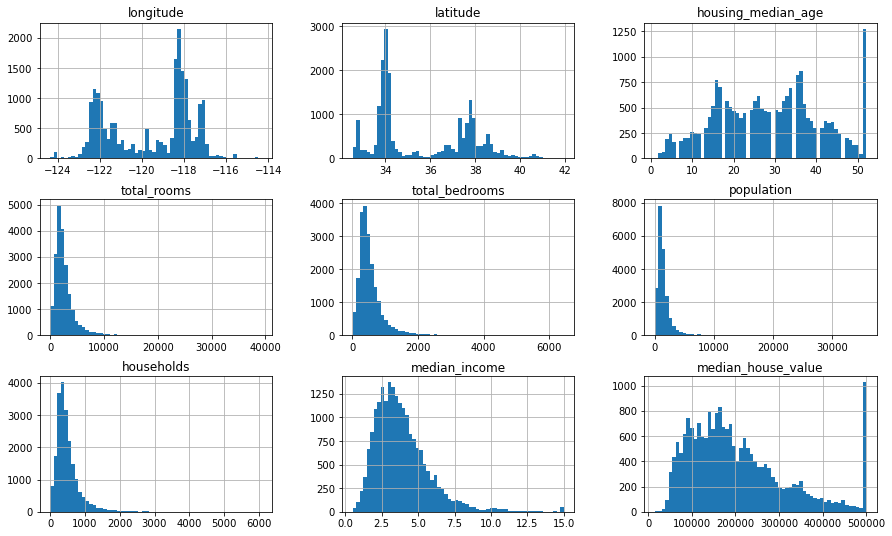

In [7]:
housing.hist(bins=60, figsize=(15,9))

<AxesSubplot:>

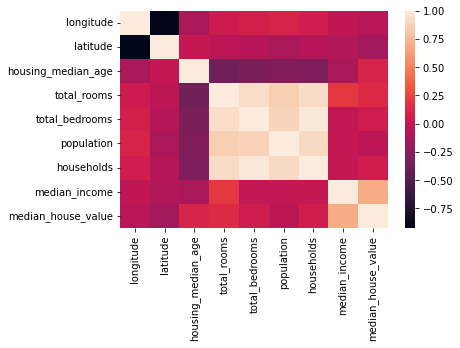

In [8]:
sns.heatmap(housing.corr())

Looking at the data, there are some major nopes that I needed to watch out for:
1. There are datapoints with null values that need to be removed or transformed (I choose to remove it)
2. From the histogram, I summarized that some features have outliers, this need to be addressed so not to disrupt the training of the model later on
3. For the "ocean_proximity" feature, can be transformed into numerical values (via dummy values) so it can be a part of the training dataset later on

In [9]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
ocean_prox = pd.get_dummies(housing["ocean_proximity"], drop_first = True)

In [11]:
ocean_prox.columns = ["in", "is", "ba", "oc"]

In [12]:
housing = pd.concat([housing, ocean_prox], axis = 1)

In [13]:
housing = housing[housing["median_house_value"] != housing["median_house_value"].max()]

In [14]:
housing = housing[housing["housing_median_age"] != housing["housing_median_age"].max()]

In [15]:
housing.dropna(inplace = True)

In [16]:
housing = housing.drop(["longitude", "latitude", "ocean_proximity"], axis = 1)

In [17]:
X = housing.drop("median_house_value", axis = 1)
y = housing["median_house_value"]

Now that the dataset is looking sparkly clean, I can proceed with the linear regression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
predictions = lm.predict(X_test)

After this, I can evaluate the result

Text(0, 0.5, 'Predictions')

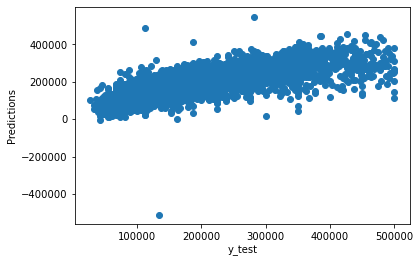

In [23]:
plt.scatter(y_test, predictions)
plt.xlabel("y_test")
plt.ylabel("Predictions")

In [24]:
print("MAE: ", mean_absolute_error(y_test, predictions))
print("MSE: ", mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))

MAE:  43950.966396727155
MSE:  3668878570.764214
RMSE:  60571.26852530178


C:\Users\Ajie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

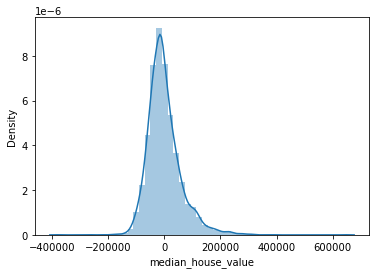

In [27]:
sns.distplot((y_test-predictions),bins=50)

In [29]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ["Coeff"])
cdf

,Coeff
housing_median_age,758.689125
total_rooms,-6.486951
total_bedrooms,59.839515
population,-32.297056
households,77.261776
median_income,39219.121238
in,-63910.476074
is,201370.290682
ba,-7220.141943
oc,12709.511165


Overall, I can see that:
1. The prediction, generally can predict the actual value
2. Something to be noted that some adjustment can be done to the model because as I can see there are some outlier predictions that needs to be addressed
3. Some information can also be gathered by looking at the coefficient of the model, like how much does each predictor variable can change the response variable and the direction of the change